И для PCA, и для t-SNE, были взяты реализации, предоставляемые библиотекой sklearn. Мне для данной задачи больше нравится метод t-SNE, потому что этот метод, как я думаю, можно настроить разными способами и под разными углами посмотреть на датасет. Кроме этого, метод нелинейный, поэтому потенциально имеет больше возможностей в сл

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, IncrementalPCA

Automatically created module for IPython interactive environment


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

n_components = 2


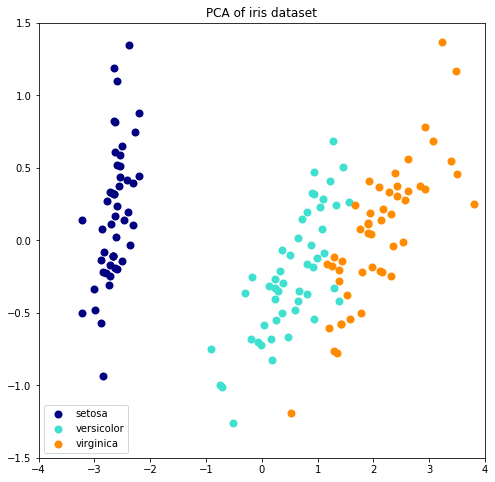

In [3]:

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange']

for X_transformed, title in [(X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)
 
    plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [4]:
perplexities = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for i, perplexity in enumerate(perplexities):
    plt.figure(figsize=(8, 8))

    ax = plt.gca()
    
    tsne = TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, learning_rate=100)
    X_tsne = tsne.fit_transform(X)
    
    ax.set_title("Perplexity=%d" % perplexity)
    
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        ax.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1],
                    color=color, lw=2, label=target_name)
    
#     ax.xaxis.set_major_formatter(NullFormatter())
#     ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    ax.legend(loc="best", shadow=False, scatterpoints=1)


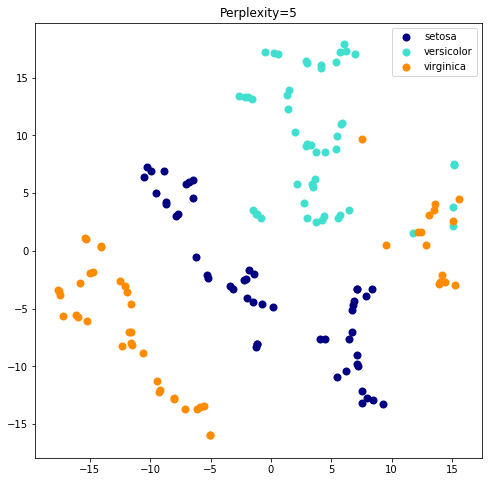

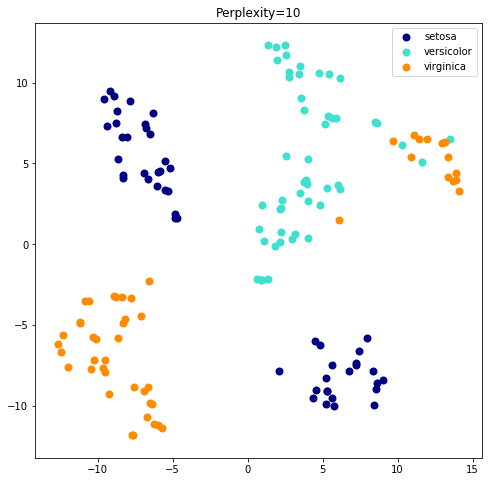

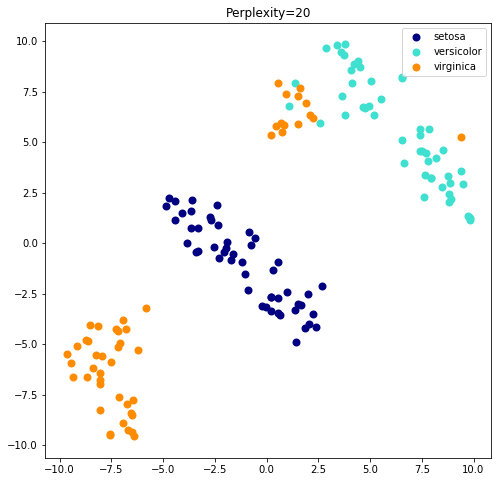

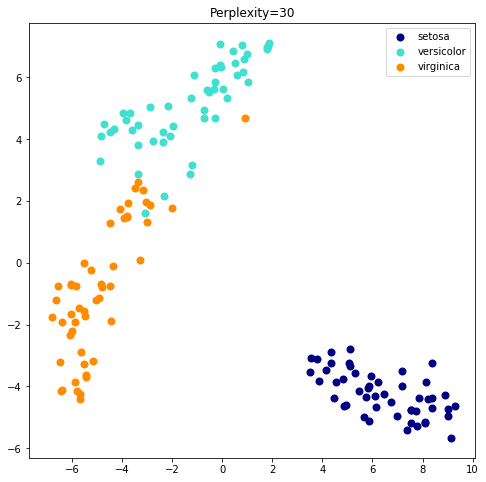

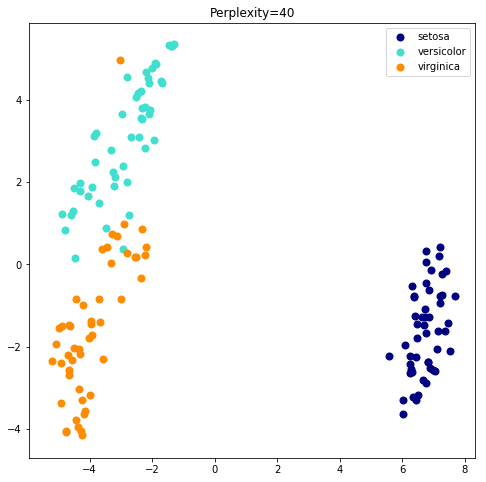

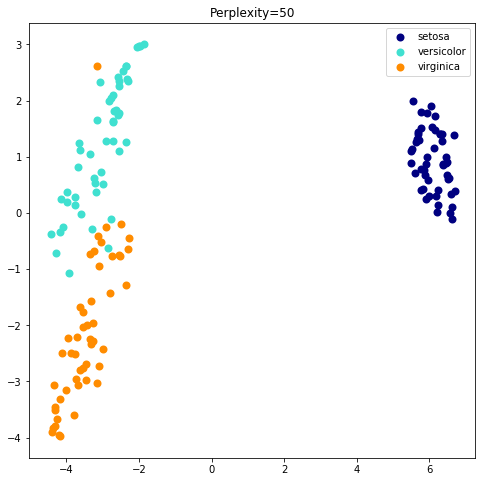

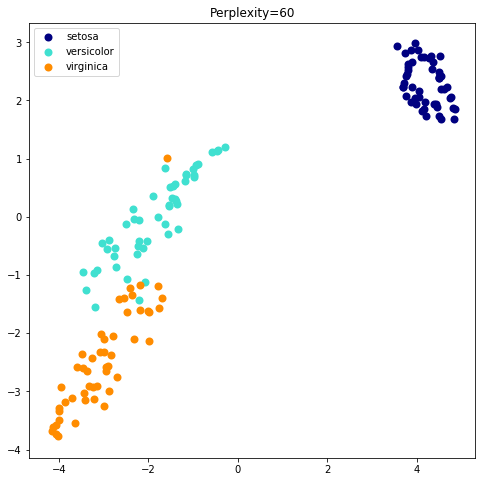

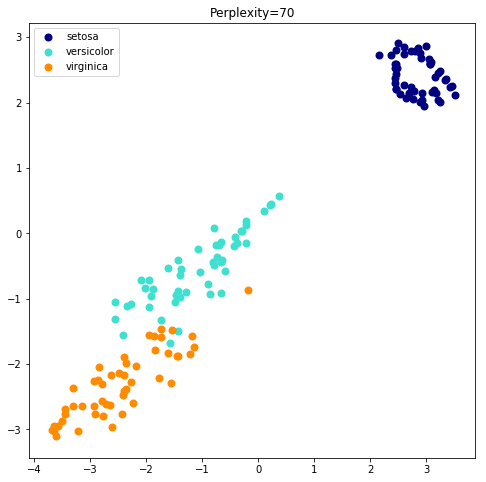

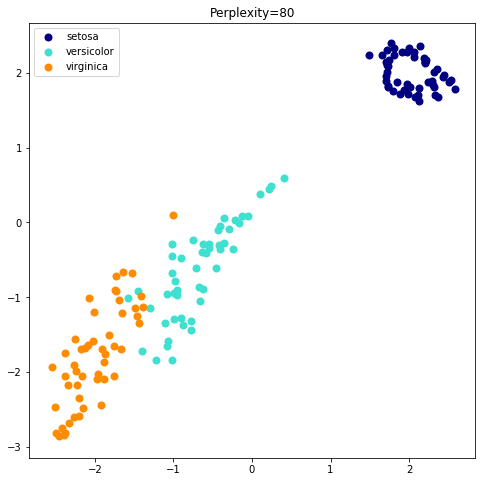

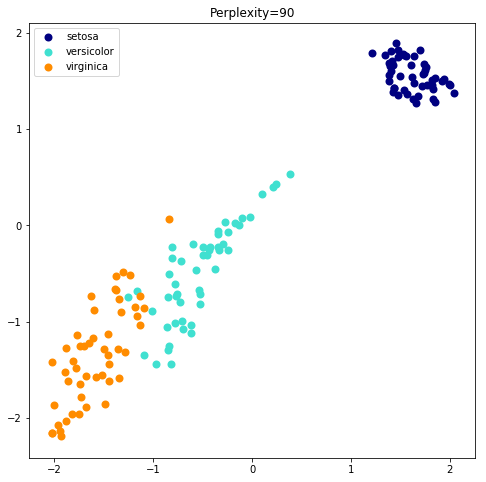

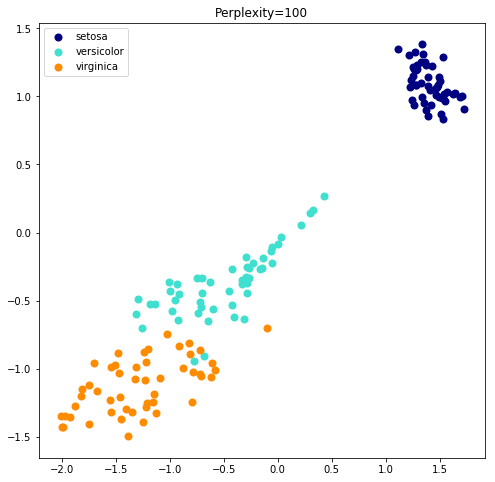

In [5]:
plt.show()